In [1]:
import sys
import pandas as pd
import os
import platform
print(platform.python_version())

3.5.4


In [2]:
rootDir = 'V:/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles/20180217_2314/'

In [3]:
motion_map = {'UndercutAndUp': 1, 'Curl_90degree': 2, 'Lotus': 3}

# Process csv file

1. Extract quaternions
2. Transpose and name data column

In [4]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternions
    df = csv_df[['quat_w','quat_x','quat_y','quat_z']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

In [5]:
# all_df = pd.DataFrame()
# df_list = []
def addCsvDf(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

# Loop through data directories
Assume that in the root directory is a set of sub-directories.<br>
The name of the sub-directory matches a motion-name.<br>
Each sub-directory contains a set of csv file, each with one motion.
One motion is a fixed set of samples of the IMU.


In [11]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        motionName = dirName.replace(rootDir, '') #Feature name based on the dir name
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                csv_file = os.path.join(dirName, fname)
                fileSize = os.path.getsize(csv_file)
                dataName = fname.replace('.CSV', '')
#                 print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                if (fileSize > 0):
                    df = pd.read_csv(csv_file)
                    if len(df.index) >= 48:
                        df = df.head(48)
                        if not df.isnull().values.any():
                            addCsvDf(df_list, df, dataName, motionName)
                        else:
                            print('Found null values')
                    else :
                        print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    all_df.columns.names = ['sample','qt']
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

In [12]:
all_df = read_csv_files(rootDir)
all_df.head(100)

Less than 49 samples: .dropbox.attr
Less than 49 samples: .dropbox.attr
Less than 49 samples: .dropbox.attr


sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691   
              DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406   
              DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517   
              DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   
              DATA5    -0.5342  0.4603  0.2696 -0.6559 -0.5482  0.4367   
              DATA6    -0.5223  0.4662  0.3555 -0.6193 -0.5359  0.4528   
              DATA7    -0.5336  0.4245  0.3156 -0.6599 -0.5433  0.4112   
              DATA8    -0.5862  0.4359  0.3292 -0.5983 -0.6052  0.4182   
              DATA9    -0.5800  0.4340  0.3274 -0.6066 -0.5965  0.4178   
              DATA10   -0.5858  0.4354  0.3359 -0.5955 -0.5982  0.4217   
              DATA11   -0.5681  0.4307  0.2999 -0.6339 -0.5832  0.4154   
              DATA12   -0.5953  0.4124  0.2927 -0.6244 -0.6054  0.3964   
              DATA13   -0.6444  0.3477  0.2029 -0.6501 -0.6537  0.3321   
              DATA14   -0.5931  0.4186  0.3132 -0.6122 -0.6033  0.4050   
              DATA15   -0.5585  0.4313  0.3514 -0.6153 -0.5681  0.4178   
              DATA16   -0.6050  0.4005  0.3098 -0.6146 -0.6147  0.3884   
              DATA17   -0.6006  0.3908  0.3140 -0.6228 -0.6130  0.3758   
              DATA18   -0.5733  0.4327  0.2863 -0.6342 -0.5839  0.4172   
              DATA19   -0.5132  0.4529  0.3049 -0.6622 -0.5356  0.4259   
              DATA20   -0.4830  0.4695  0.3049 -0.6733 -0.5057  0.4377   
              DATA21   -0.4625  0.5148  0.3157 -0.6492 -0.4801  0.4954   
              DATA22   -0.4719  0.4810  0.2759 -0.6854 -0.4848  0.4661   
              DATA23   -0.6340  0.3596  0.2933 -0.6186 -0.6473  0.3364   
              DATA24   -0.5782  0.3837  0.2835 -0.6619 -0.5857  0.3674   
              DATA25   -0.5171  0.4365  0.2910 -0.6763 -0.5304  0.4145   
UndercutAndUp DATA0     0.3701 -0.4883 -0.5746  0.5425  0.3480 -0.5373   
              DATA1     0.4117 -0.4879 -0.4786  0.6028  0.3942 -0.5092   
              DATA2     0.2808 -0.5282 -0.5795  0.5535  0.2390 -0.6346   
              DATA3     0.2884 -0.6479 -0.4515  0.5414  0.2128 -0.7639   
...                        ...     ...     ...     ...     ...     ...   
              DATA22    0.3668 -0.5663 -0.4141  0.6110  0.3148 -0.6393   
              DATA23    0.2845 -0.6492 -0.3708  0.6001  0.2279 -0.7278   
              DATA24    0.3092 -0.6184 -0.2577  0.6749  0.2458 -0.6771   
              DATA25    0.3688 -0.5413 -0.4477  0.6088  0.3151 -0.5992   
Lotus         DATA25   -0.2584 -0.6901  0.4169  0.5323 -0.2815 -0.6415   
              DATA13   -0.2370 -0.6195  0.5607  0.4957 -0.2599 -0.5778   
              DATA14   -0.2687 -0.6107  0.4962  0.5556 -0.2970 -0.5685   
              DATA15   -0.2897 -0.5169  0.6946  0.4078 -0.3004 -0.4195   
              DATA16   -0.2303 -0.6602  0.4086  0.5866 -0.2701 -0.6139   
              DATA17   -0.2468 -0.6164  0.4987  0.5573 -0.2728 -0.5800   
              DATA18   -0.2581 -0.5712  0.5563  0.5455 -0.2692 -0.5125   
              DATA19   -0.1913 -0.6425  0.4442  0.5944 -0.2344 -0.6017   
              DATA20   -0.2667 -0.4648  0.7553  0.3773 -0.2690 -0.4207   
              DATA21   -0.2794 -0.5680  0.6417  0.4330 -0.3159 -0.5023   
              DATA22   -0.2800 -0.5709  0.6639  0.3936 -0.3102 -0.4993   
              DATA23   -0.2368 -0.5932  0.6590  0.3972 -0.2643 -0.5287   
              DATA24   -0.1724 -0.6558  0.3785  0.6300 -0.2020 -0.6307   
              DATA0    -0.2866 -0.6842  0.4042  0.5351 -0.3180 -0.6118   
              DATA1    -0.1943 -0.7123  0.4976  0.4551 -0.2253 -0.6750   
              DATA2    -0.1846 -0.6661  0.5864  0.4222 -0.2250 -0.6093   
    

In [14]:
X = all_df
df = all_df.copy()
# df.index.names = ['motion', 'dataName']
df = df.reset_index()
Y = df['motion']
Y.head(10)

0    Curl_90degree
1    Curl_90degree
2    Curl_90degree
3    Curl_90degree
4    Curl_90degree
5    Curl_90degree
6    Curl_90degree
7    Curl_90degree
8    Curl_90degree
9    Curl_90degree
Name: motion, dtype: object

In [15]:
X.head()

sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691   
              DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406   
              DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517   
              DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   

sample                                      2            ...        45  \
qt                      quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA2     0.3000 -0.6956 -0.4645  0.4528   ...    0.2961   
              DATA3     0.2780 -0.7291 -0.4519  0.4203   ...    0.2836   
              DATA4     0.2455 -0.7242 -0.4689  0.4351   ...    0.3291   
              DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   

sample                              46                              47  \
qt                      quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA2    -0.7042 -0.4512  0.4655  0.3080 -0.6964 -0.4448   
              DATA3    -0.7089 -0.4351  0.4817  0.2955 -0.7009 -0.4277   
              DATA4    -0.6689 -0.4191  0.5174  0.3287 -0.6698 -0.4187   
              DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   

sample                                          
qt                      quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA2     0.4739  0.3164 -0.6910  
              DATA3     0.4913  0.3047 -0.6949  
              DATA4     0.5166  0.3269 -0.6716  
              DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  

[5 rows x 192 columns]

In [16]:
X.isnull().values.any()

False

In [17]:
Y.isnull().values.any()

False

# Label Encoding
We need to map the textual values of the predicted labels to a number.

In [18]:
y_encoded = Y.map(motion_map)
y_encoded.head()

0    2
1    2
2    2
3    2
4    2
Name: motion, dtype: int64

# Learn

In [19]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#gnb = GaussianNB()
rdf = RandomForestClassifier()
# y_pred = gnb.fit(X, Y).predict(X)
# print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))
model = rdf.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 62 points : 0


In [21]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = model.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        16



# Plotting

In [27]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [28]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motion is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [29]:
def plotMotion(X, motionName):
    fig, (ax_w,ax_x,ax_y,ax_z) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    fig.suptitle(motionName, fontsize=20)
    ax_w.set_autoscaley_on(False)
    ax_w.set_ylim([-1,1])
    ax_w.set_title('w')
    ax_x.set_autoscaley_on(False)
    ax_x.set_ylim([-1,1])
    ax_x.set_title('x')
    ax_y.set_autoscaley_on(False)
    ax_y.set_ylim([-1,1])
    ax_y.set_title('y')
    ax_z.set_autoscaley_on(False)
    ax_z.set_ylim([-1,1])
    ax_z.set_title('z')
    ax_w.plot(getMultiMotions(X, 'quat_w', motionName).T)
    ax_x.plot(getMultiMotions(X, 'quat_x', motionName).T)
    ax_y.plot(getMultiMotions(X, 'quat_y', motionName).T)
    ax_z.plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

In [30]:
motionNames = X.index.levels[0].tolist()
motionNames

['Curl_90degree', 'Lotus', 'UndercutAndUp']

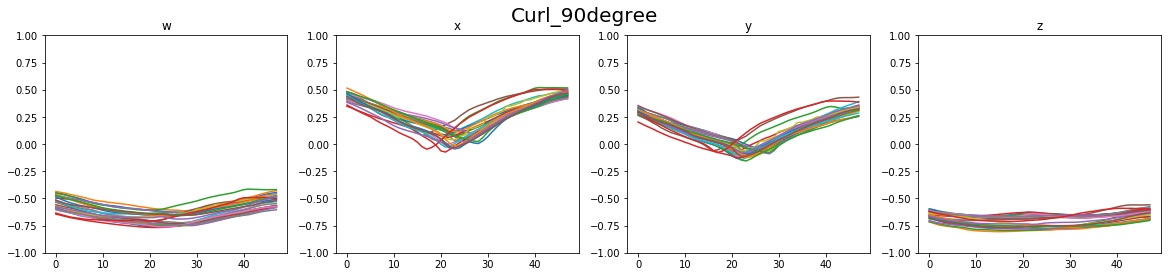

In [31]:
plotMotion(X, motionNames[0])
plt.show()

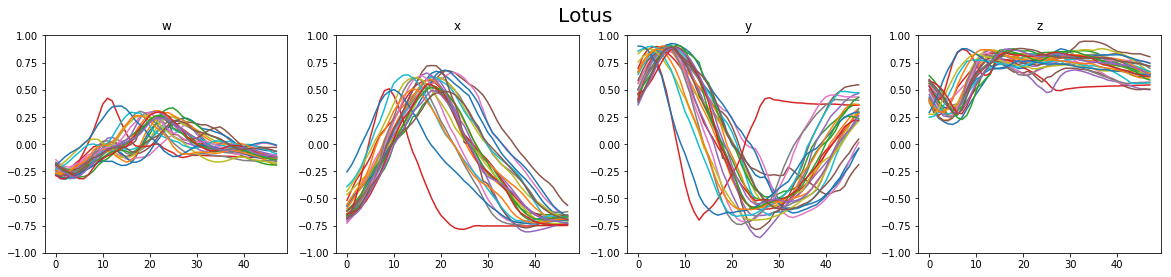

In [33]:
plotMotion(X, motionNames[1])
plt.show()